## Multiple Linear Regression

### Завдання

Використовуючи дані з файлу **petrol_consumption.csv** побудуйте модель множинної регресії для знаходження залежності між значеннями споживання бензину і похідними факторами. 

Оцініть якість отриманої регресії.

### Розв'язок

In [141]:
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

from collections import Counter

In [142]:
data = 'petrol_consumption.csv'

In [143]:
petrol_cons = pd.read_csv(data)
petrol_cons.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


**Споживання бензину** 

Petrol_tax - Податок на бензин

Average_income - Середній дохід

Paved_Highways - Асфальтовані шосе

Population_Driver_licence(%) Водійське посвідчення у населення (%)

Petrol_Consumption - Споживання бензину

In [144]:
petrol_cons.columns = ['Податок на бензин', 'Середній дохід', 'Асфальтовані шосе', 'Водійське посвідчення у населення (%)', 'Споживання бензину']

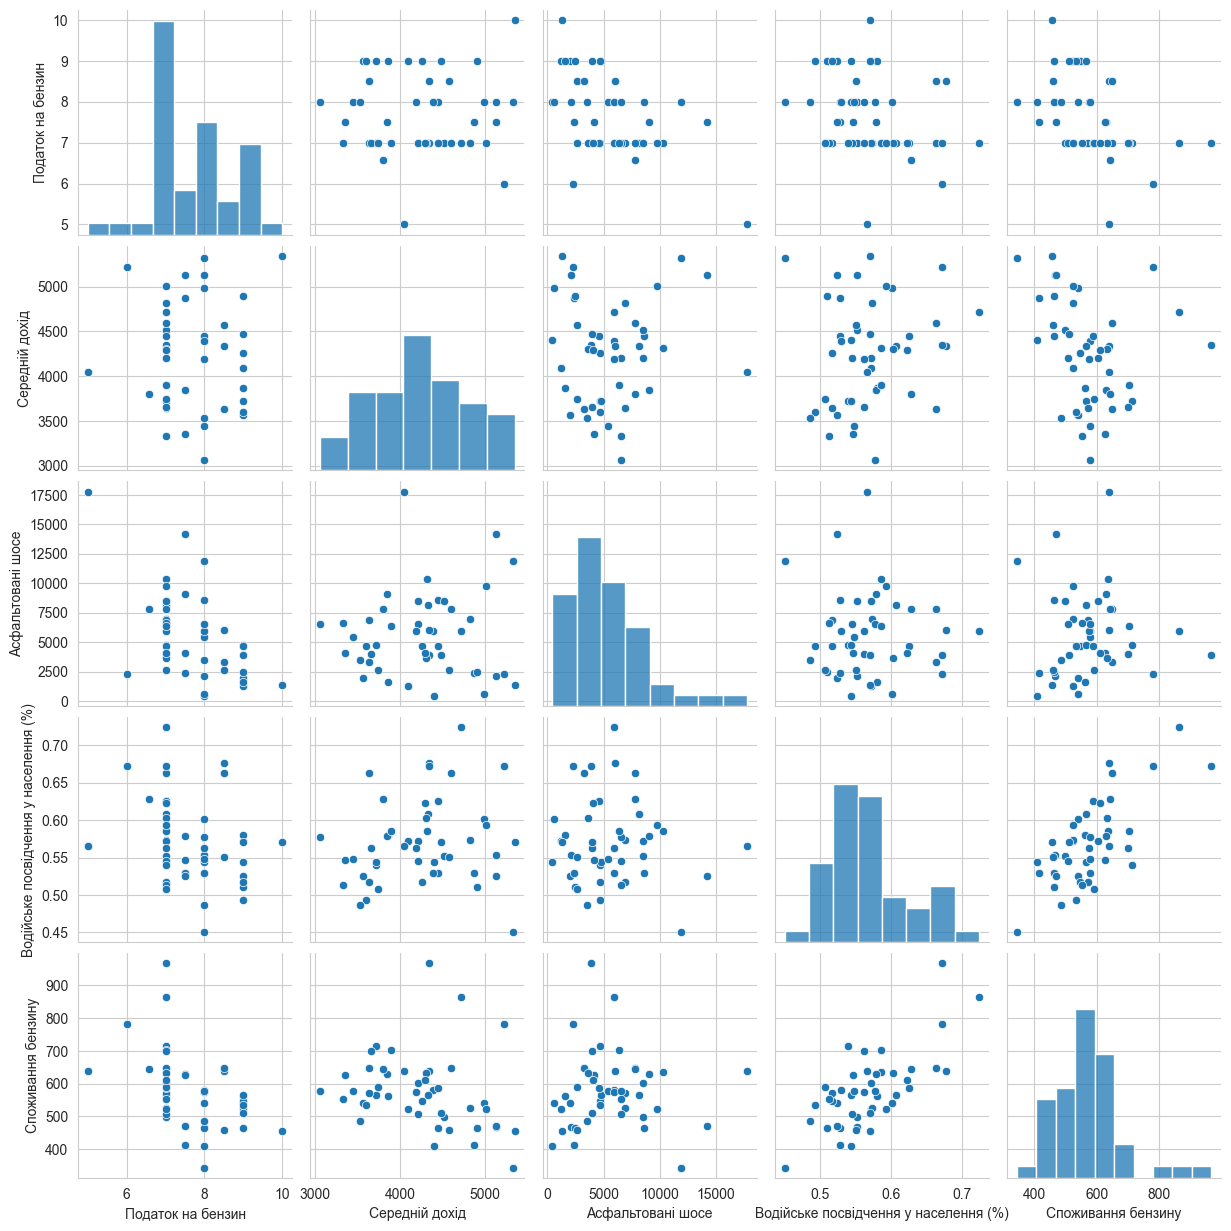

In [145]:
sb.pairplot(petrol_cons)

In [146]:
correlations = petrol_cons.corr()
correlations

,Податок на бензин,Середній дохід,Асфальтовані шосе,Водійське посвідчення у населення (%),Споживання бензину
Податок на бензин,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Середній дохід,0.012665,1.000000,0.050163,0.157070,-0.244862
Асфальтовані шосе,-0.522130,0.050163,1.000000,-0.064129,0.019042
Водійське посвідчення у населення (%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Споживання бензину,-0.451280,-0.244862,0.019042,0.698965,1.000000


[Text(0.5, 1.0, 'Теплова карта даних про споживання бензину - кореляція Пірсона')]

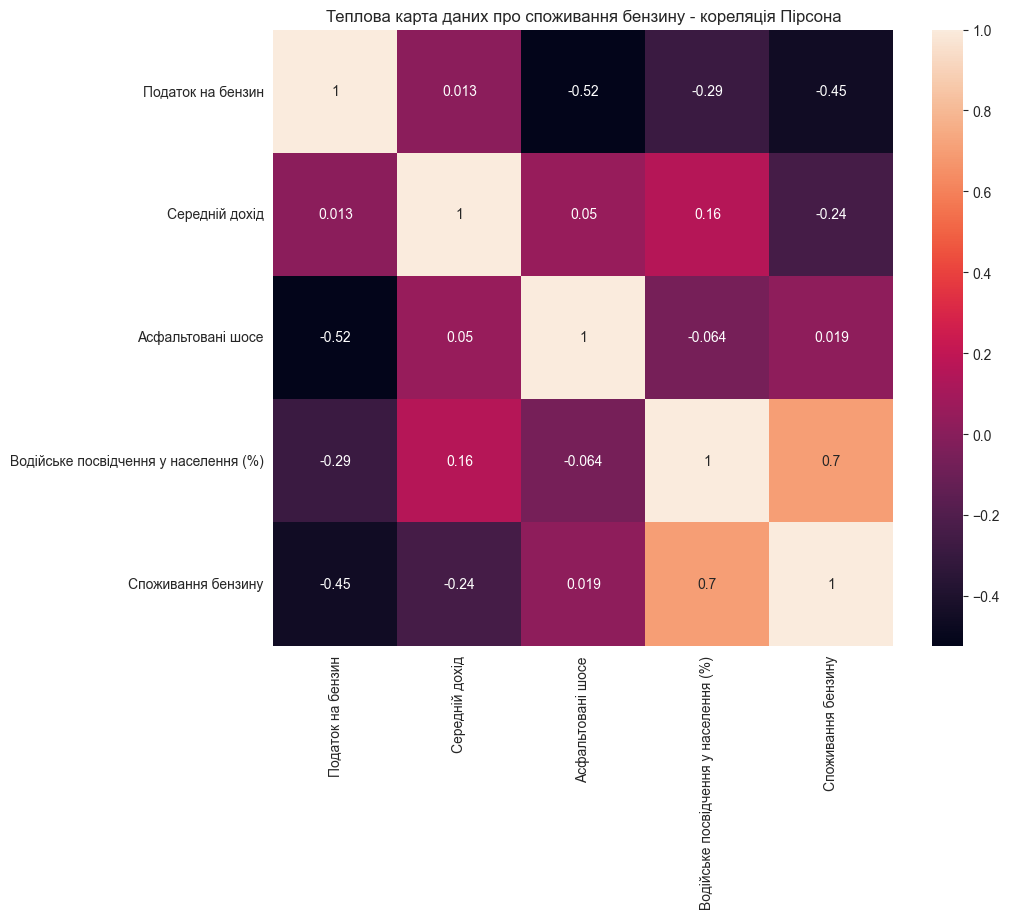

In [147]:
sb.heatmap(correlations, annot=True).set(title='Теплова карта даних про споживання бензину - кореляція Пірсона')

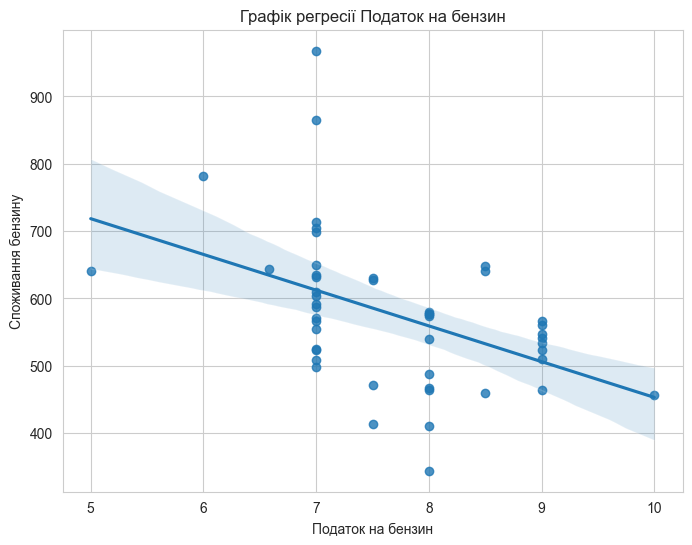

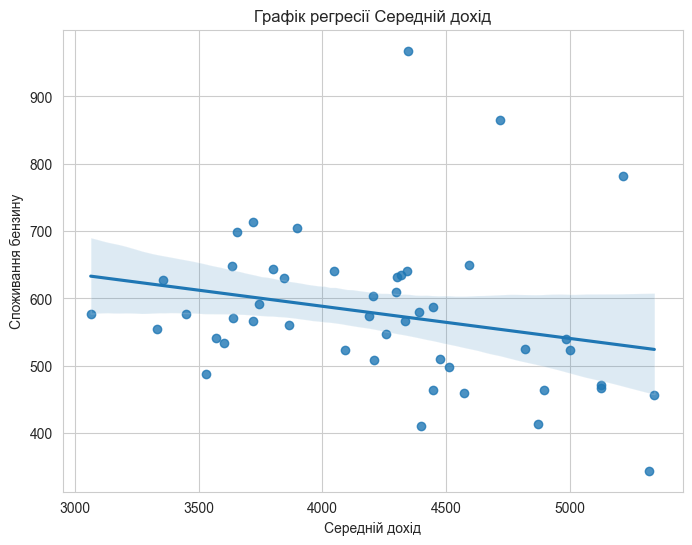

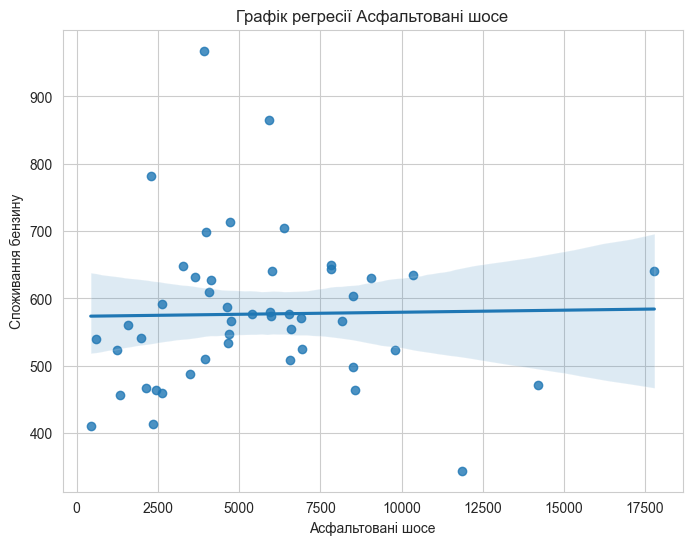

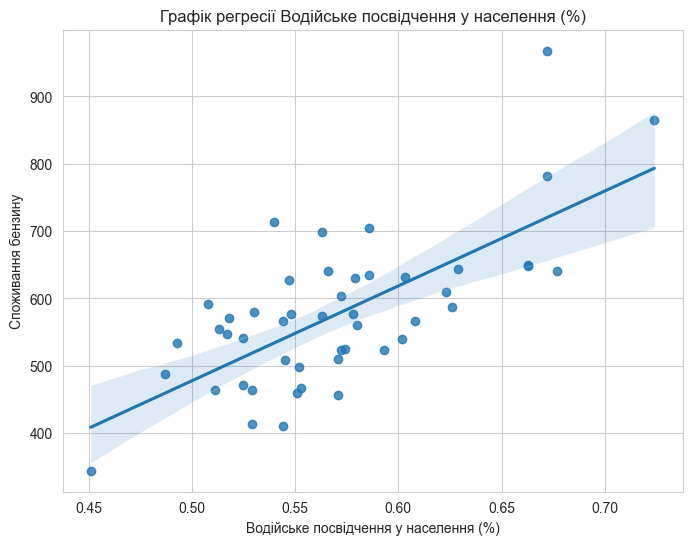

In [148]:
variables = ['Податок на бензин', 'Середній дохід', 'Асфальтовані шосе', 'Водійське посвідчення у населення (%)']

for var in variables:
    plt.figure(figsize=(8, 6), dpi=100)
    sb.regplot(x=var, y='Споживання бензину', data=petrol_cons).set(title=f'Графік регресії {var}')

##  Предиктор: Споживання бензину

##  Провідні фактори: Податок на бензин та Асфальтовані шосе

In [149]:
petrol_cons_data = petrol_cons[['Податок на бензин', 'Асфальтовані шосе']].values
petrol_cons_target = petrol_cons[['Споживання бензину']].values
petrol_cons_data_names = ['Податок на бензин', 'Асфальтовані шосе']

X1, y1 = scale(petrol_cons_data), petrol_cons_target

In [150]:
# Missing Values
missing_values = X1 == np.NAN
X1[missing_values == True] 

array([], dtype=float64)

## Будуємо модель лінійної регресії

In [151]:
LinReg = LinearRegression()

LinReg.fit(X1, y1)

print(LinReg.score(X1, y1))

0.26814437986026596


In [152]:
print('Beta0: ', LinReg.intercept_)
print('Beta: ', LinReg.coef_)

Beta0:  [576.77083333]
Beta:  [[-67.17584596 -32.96632057]]


## Перевірка моделі

In [153]:
y_pred1 = LinReg.predict(X)
print('prediction: ', y_pred1, sep='\n')

prediction: 
[[515.93677762]
 [522.8641072 ]
 [519.65807037]
 [619.4613898 ]
 [602.08067415]
 [450.67028757]
 [492.95137891]
 [585.79286205]
 [524.35336463]
 [596.42314116]
 [549.52457044]
 [506.5344676 ]
 [611.47052234]
 [614.81014404]
 [599.7436793 ]
 [578.93306525]
 [596.41359938]
 [632.51013902]
 [621.15542526]
 [513.14617823]
 [602.84475659]
 [600.44903041]
 [511.42351744]
 [490.07856392]
 [545.50234157]
 [489.50605734]
 [554.67712963]
 [555.43607101]
 [549.18106649]
 [490.42206786]
 [611.70906675]
 [614.67655917]
 [543.94263132]
 [602.5724458 ]
 [572.84467165]
 [632.83353451]
 [650.7268706 ]
 [616.67079041]
 [539.25247811]
 [640.33439557]
 [633.33073178]
 [639.57105347]
 [642.91067516]
 [652.68145407]
 [727.03171512]
 [497.17764547]
 [638.63595939]
 [584.14287509]]


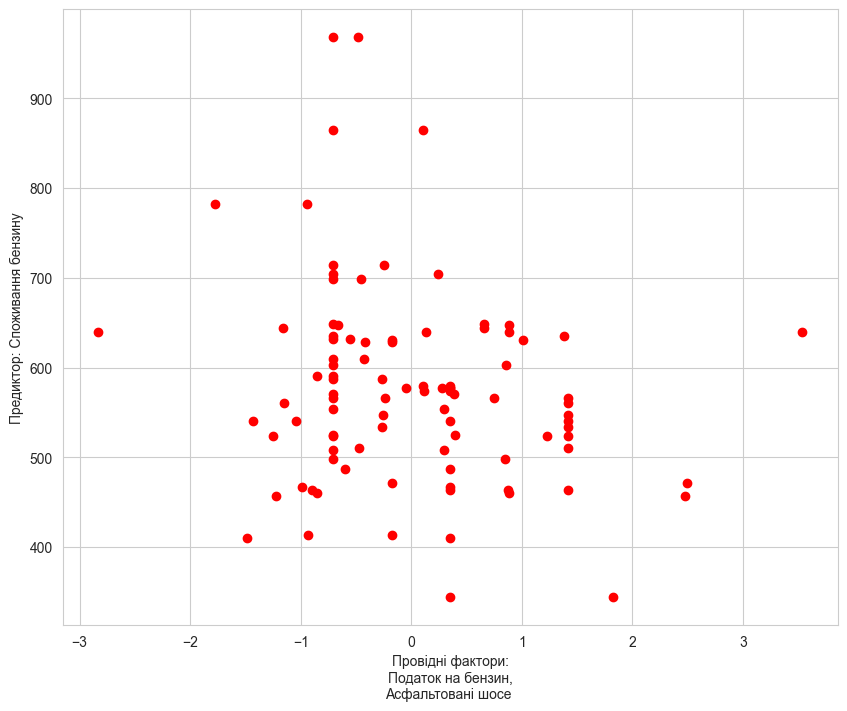

In [154]:
plt.plot(X1, y1, 'ro')
plt.xlabel('Провідні фактори:\nПодаток на бензин,\nАсфальтовані шосе ')
plt.ylabel('Предиктор: Споживання бензину')
plt.show()

## Висновок

Оскільки перевірочний параметр становить **0,268**, наша регресійна модель не працює. Це також підтверджується графіком.

Тому потрібно здійснити оцінку якості лінійної регресії.

## Оцінка якості лінійної регресії

In [155]:
mae = mean_absolute_error(y1, y_pred1)
mse = mean_squared_error(y1, y_pred1)
rmse = np.sqrt(mse)

In [156]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 70.24
Mean squared error: 8970.82
Root mean squared error: 94.71


##  Предиктор: Споживання бензину

##  Провідні фактори: Середній дохід та Водійське посвідчення у населення (%)

In [157]:
petrol_cons_data = petrol_cons[['Середній дохід', 'Водійське посвідчення у населення (%)']].values
petrol_cons_target = petrol_cons[['Споживання бензину']].values
petrol_cons_data_names = ['Середній дохід', 'Водійське посвідчення у населення (%)']

X2, y2 = scale(petrol_cons_data), petrol_cons_target

In [158]:
# Missing Values
missing_values = X2 == np.NAN
X2[missing_values == True] 

array([], dtype=float64)

## Будуємо модель лінійної регресії

In [159]:
LinReg = LinearRegression()

LinReg.fit(X2, y2)

print(LinReg.score(X2, y2))

0.6175098135108323


In [160]:
print('Beta0: ', LinReg.intercept_)
print('Beta: ', LinReg.coef_)

Beta0:  [576.77083333]
Beta:  [[-40.25784231  83.70870277]]


## Перевірка моделі

In [161]:
y_pred2 = LinReg.predict(X)
print('prediction: ', y_pred2, sep='\n')

prediction: 
[[432.82147118]
 [415.23146531]
 [423.37229447]
 [506.09288917]
 [438.17864166]
 [374.4519965 ]
 [715.28180579]
 [479.53696125]
 [635.54529157]
 [676.63973293]
 [571.63009117]
 [792.83905928]
 [638.43113891]
 [629.95110853]
 [668.20815987]
 [721.05086346]
 [676.66396159]
 [585.00694752]
 [613.83905081]
 [551.95510218]
 [660.33384595]
 [442.32174221]
 [444.28162652]
 [498.48113497]
 [469.79572214]
 [499.93485446]
 [558.54661573]
 [668.66718587]
 [572.50232286]
 [497.60890327]
 [637.82542245]
 [630.29030975]
 [585.80385623]
 [548.97761423]
 [512.41525046]
 [678.30583387]
 [986.94143286]
 [625.22652018]
 [485.66549328]
 [565.13944778]
 [582.92328291]
 [567.07774043]
 [558.59771005]
 [533.78756403]
 [569.09135608]
 [480.45501325]
 [569.45214894]
 [707.82201607]]


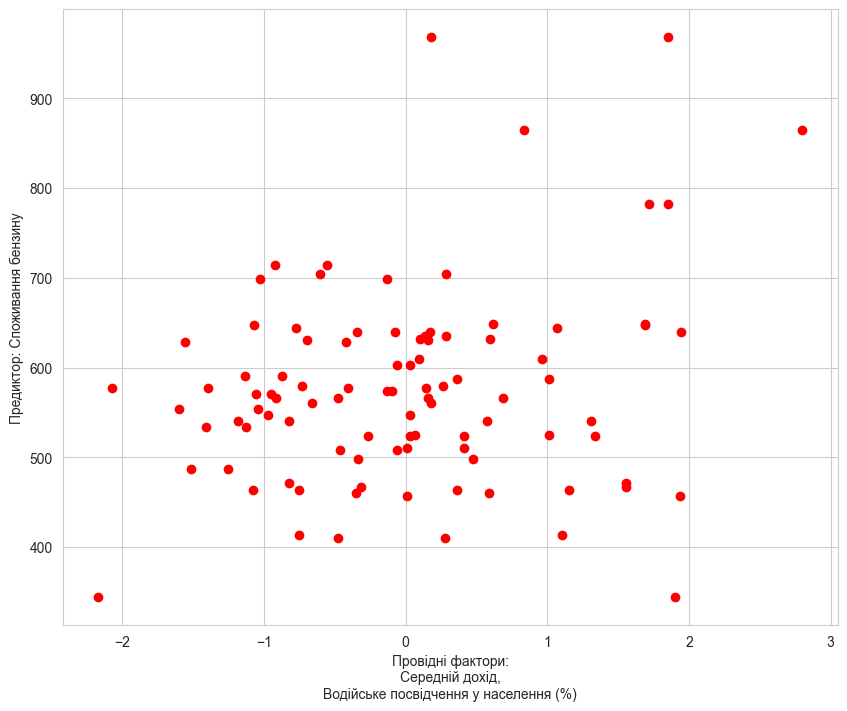

In [163]:
plt.plot(X2, y2, 'ro')
plt.xlabel('Провідні фактори:\nСередній дохід,\nВодійське посвідчення у населення (%)')
plt.ylabel('Предиктор: Споживання бензину')
plt.show()

## Висновок

При таких провідних факторах перевірочний параметр вище і становить **0,618**. Ця регресійна модель працює краще. 

Здійснимо оцінку якості лінійної регресії.

## Оцінка якості лінійної регресії

In [164]:
mae = mean_absolute_error(y2, y_pred2)
mse = mean_squared_error(y2, y_pred2)
rmse = np.sqrt(mse)

In [165]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 103.11
Mean squared error: 20028.79
Root mean squared error: 141.52
